# Contents

[**Decision Tree**](#Decision-Tree)

[**Bias and Variance**](#Bias-and-Variance)

[**Random Forest**](#Random-Forest)

[**Gradient Boosting Trees**](#Gradient-Boosting-Trees)

[**XGBoost**](#XGBoost)

In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from IPython.display import Image

In [144]:
c_turquoise = '#00ced1'
c_orange_red = '#ff4500'
c_salmon = '#fa8072'
c_royal_blue = '#4169e1'
c_emerald = '#50c878'
c_teal = '#008080'
c_grey = '#708090'
c_lilac = '#c8a2c8'
c_light_magenta = '#ff80ca'

# Decision Tree

- Binary tree: Each node chooses a feature and split point, and splits the dataset into two subsets
- Handles both regression and classification problems
- Handles missing data
    - Find a surrogate feature that best matches the primary feature, and use it when the primary feature is missing
    - For categorical feature, add one factor of "missing"
    - XGBoost: Put the rows with missing values in left/right child node, and compare the performance
- Easy to interpret

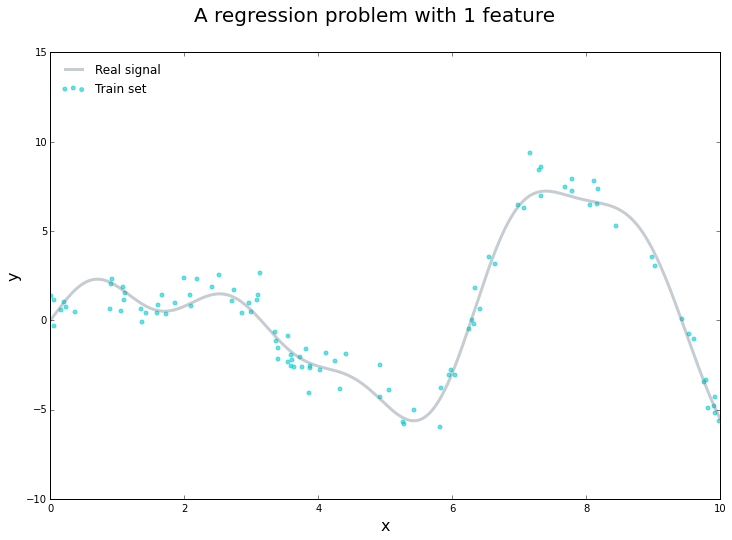

In [107]:
import numpy as np
import matplotlib.pyplot as plt

def ground_truth(x):
    """Ground truth -- function to approximate"""
    return x * np.sin(x) + np.sin(2 * x) + np.sin(3 * x)

def gen_data(n_samples=200):
    """generate training and testing data"""
    np.random.seed(100)
    x = np.random.uniform(0, 10, size=n_samples)
    x.sort()
    y = ground_truth(x) + 0.75 * np.random.normal(size=n_samples)
    train_mask = np.random.randint(0, 2, size=n_samples).astype(np.bool)
    x_train, y_train = x[train_mask, np.newaxis], y[train_mask]
    x_test, y_test = x[~train_mask, np.newaxis], y[~train_mask]
    return x_train, x_test, y_train, y_test
    

X_train, X_test, y_train, y_test = gen_data(200)

# plot ground truth
x_plot = np.linspace(0, 10, 500)

def plot_data(title='', figsize=(12, 8)):
    fig = plt.figure(figsize=figsize)
    gt = plt.plot(x_plot, ground_truth(x_plot), label='Real signal',
                  alpha=0.4, linewidth=3, color=c_grey)

    # plot training and testing data
    plt.scatter(X_train, y_train, s=15, alpha=0.6, color=c_turquoise, label='Train set')
#     plt.scatter(X_test, y_test, s=15, alpha=0.6, color=c_orange_red, label='Test set')
    plt.xlim((0, 10))
    plt.ylabel('y', fontsize=16)
    plt.xlabel('x', fontsize=16)
    plt.suptitle(title, fontsize=20)
    
    plt.legend(loc='upper left', frameon=False)
    
plot_data(title='A regression problem with 1 feature', figsize=(12, 8))

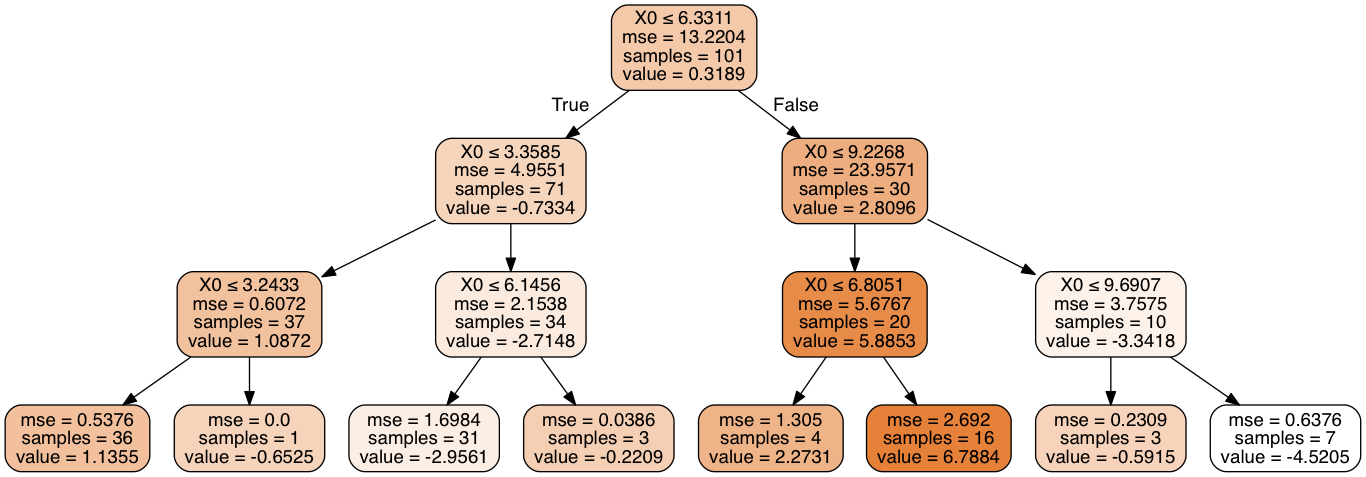

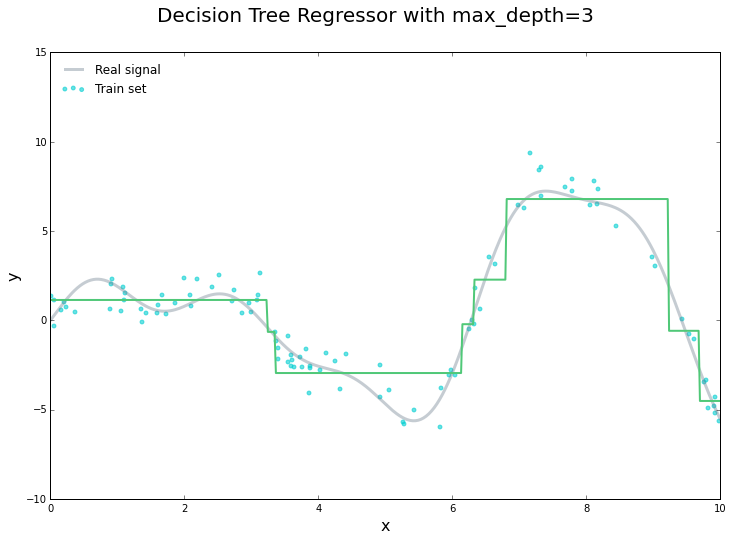

In [108]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot

dtr = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
plot_data(title='Decision Tree Regressor with max_depth=3')
plt.plot(x_plot, dtr.predict(x_plot[:, np.newaxis]),
         label='Decision Tree max_depth=3', color=c_emerald, alpha=1, linewidth=2)

dot_data = StringIO()
tree.export_graphviz(dtr, out_file=dot_data,
                     filled=True,
                     rounded=True,
                     special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png()) 

## Criterion for regression

**Mean Squared Error**
$$c = \frac{1}{N}\sum_i y_i$$
$$H = \frac{1}{N}\sum_i (y_i - c)^2$$

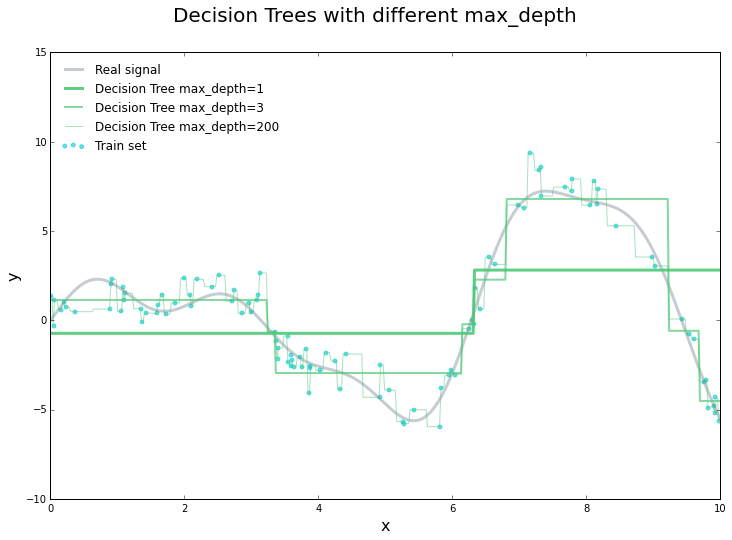

In [109]:
plot_data(title='Decision Trees with different max_depth')

dtr1 = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
plt.plot(x_plot, dtr1.predict(x_plot[:, np.newaxis]),
         label='Decision Tree max_depth=1', color='#50c878', alpha=0.9, linewidth=3)

dtr2 = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
plt.plot(x_plot, dtr2.predict(x_plot[:, np.newaxis]),
         label='Decision Tree max_depth=3', color='#50c878', alpha=0.7, linewidth=2)

dtr3 = DecisionTreeRegressor(max_depth=200).fit(X_train, y_train)
plt.plot(x_plot, dtr3.predict(x_plot[:, np.newaxis]),
         label='Decision Tree max_depth=200', color='#50c878', alpha=0.5, linewidth=1)

plt.legend(loc='upper left', frameon=False)

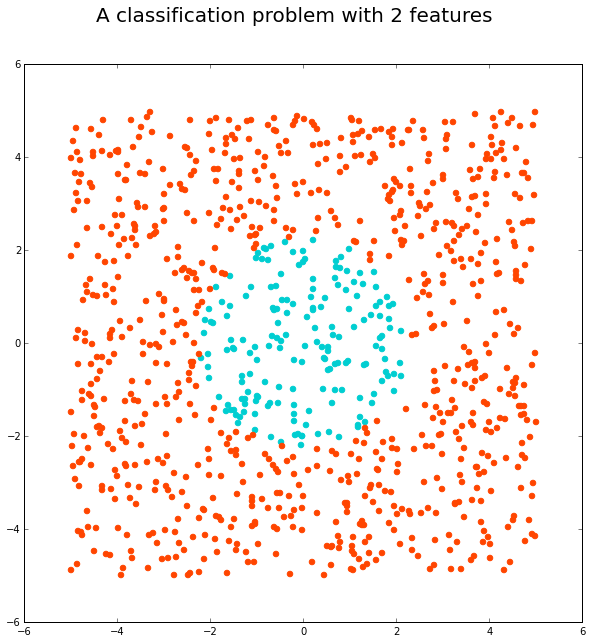

In [110]:
n_samples = 1000
np.random.seed(101)
xs = np.random.uniform(-5, 5, size=n_samples)
np.random.seed(102)
ys = np.random.uniform(-5, 5, size=n_samples)

class1_mask = np.asarray(map(lambda x: x[0] ** 2 + x[1] ** 2 <= 5, zip(xs, ys)))
x1, y1 = xs[class1_mask], ys[class1_mask]
x2, y2 = xs[~class1_mask], ys[~class1_mask]

fig = plt.figure(figsize=(10, 10))
plt.scatter(x1, y1, s=30, color=c_turquoise)
plt.scatter(x2, y2, s=30, color=c_orange_red)

plt.suptitle("A classification problem with 2 features", fontsize=20)

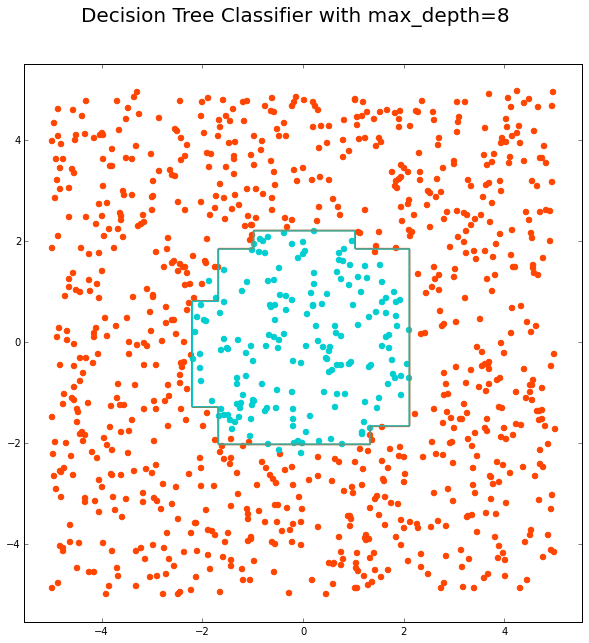

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six.moves import xrange

# Parameters
n_classes = 2
max_depth = 8
plot_colors = [c_orange_red, c_turquoise]
cmap = plt.cm.RdBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses

fig = plt.figure(figsize=(10, 10))

X = np.asarray(zip(xs, ys))
y = class1_mask.astype(int)

dtc = DecisionTreeClassifier(max_depth=max_depth)
clf = dtc.fit(X, y)
scores = clf.score(X, y)

# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

pred = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)
cs = plt.contour(xx, yy, pred, colors=plot_colors, linewidth=10)
# cs = plt.contourf(xx, yy, pred, cmap=cmap, linewidth=10)

# Plot the training points
for i, c in zip(xrange(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], color=c, s=30)

plt.suptitle("Decision Tree Classifier with max_depth=%d" % max_depth, fontsize=20)
plt.axis("tight")

plt.show()

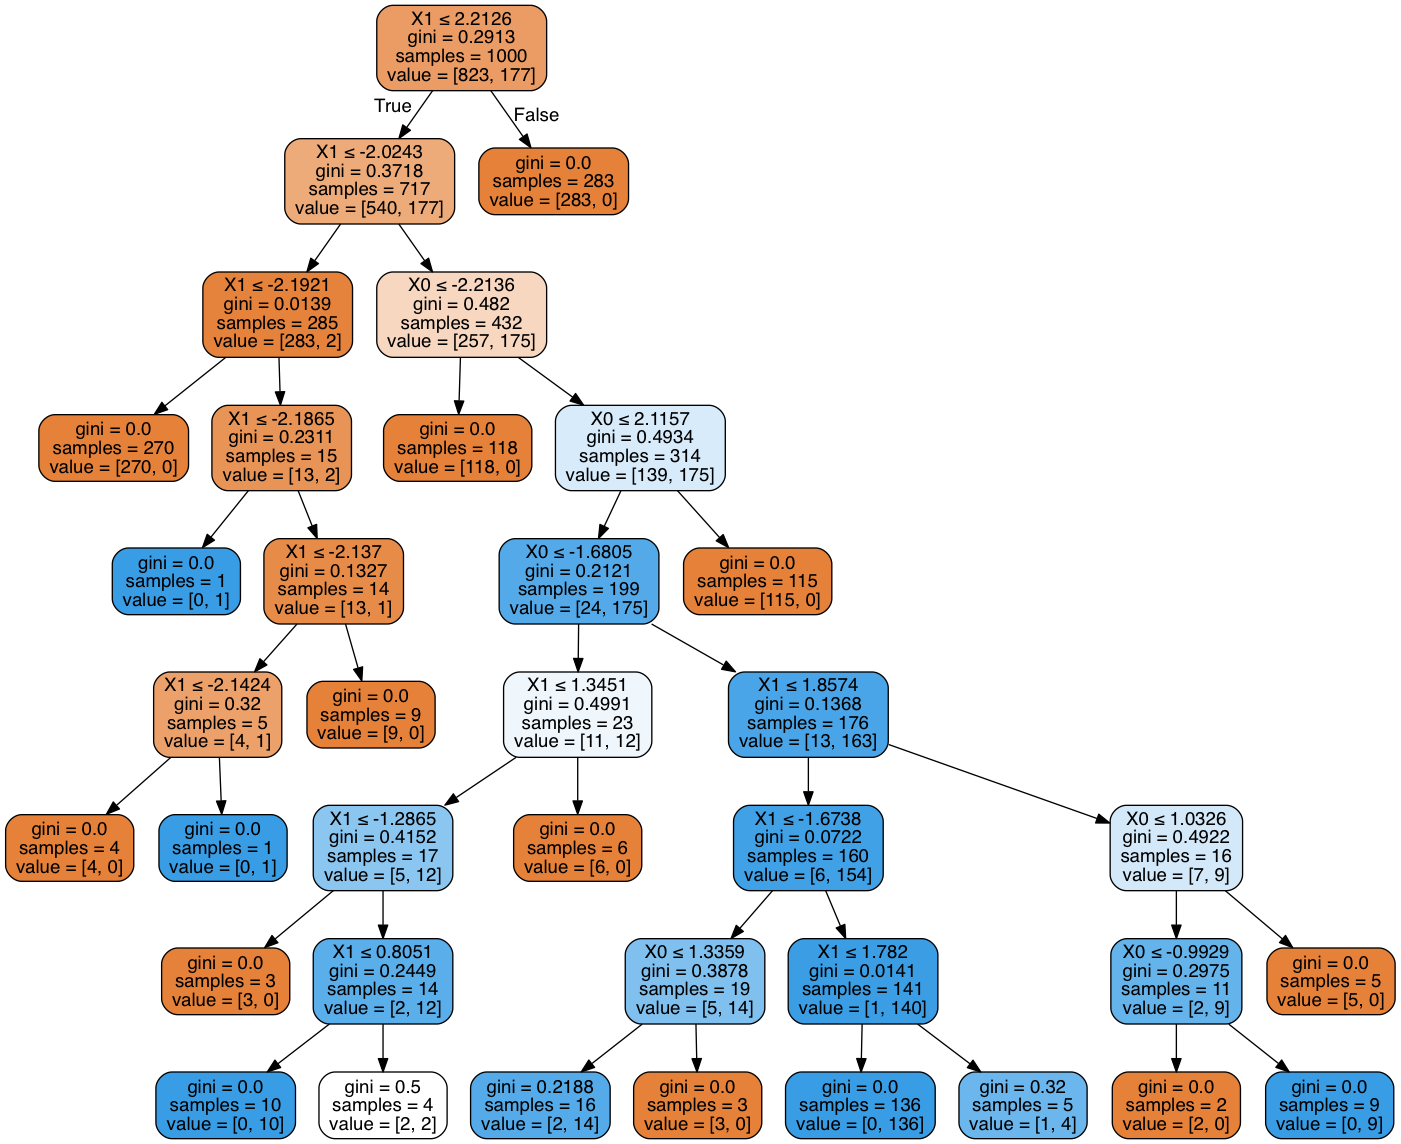

In [112]:
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data,
                     filled=True,
                     rounded=True,
                     special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png()) 

## Criteria for classification

**Gini impurity**, or Gini index:
$$H = \sum_k p_k (1-p_k)$$

**Cross entropy**
$$H = -\sum_k p_k\log{p_k}$$

## Single tree sucks, we need more

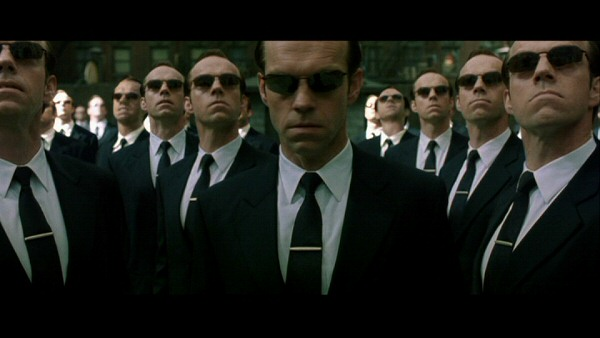

In [57]:
Image(filename='agent-smith.jpg')

# Bias and Variance

Source: http://scott.fortmann-roe.com/

**Bias**: How far the average prediction is from the true value

**Variance**: How far the predictions are from their mean

**Irreducible Error**: Noises within the training set

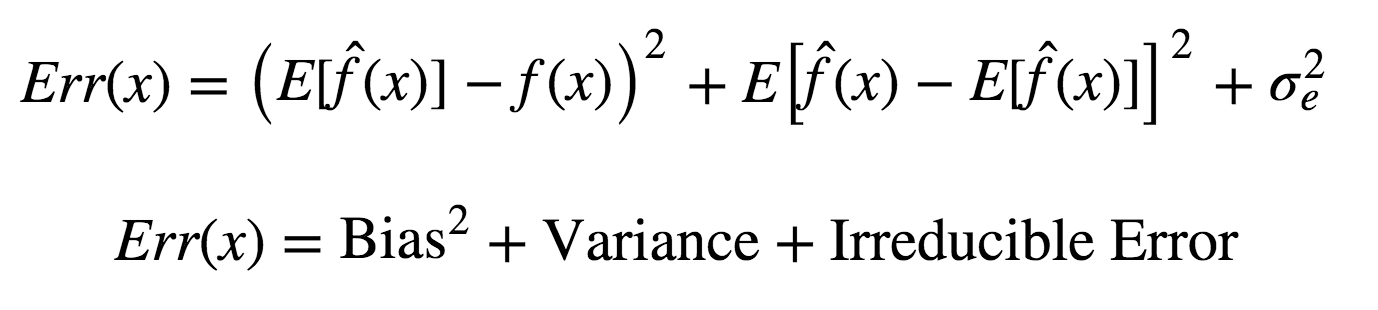

In [13]:
Image(filename='bias-var-equation.png', width=500)

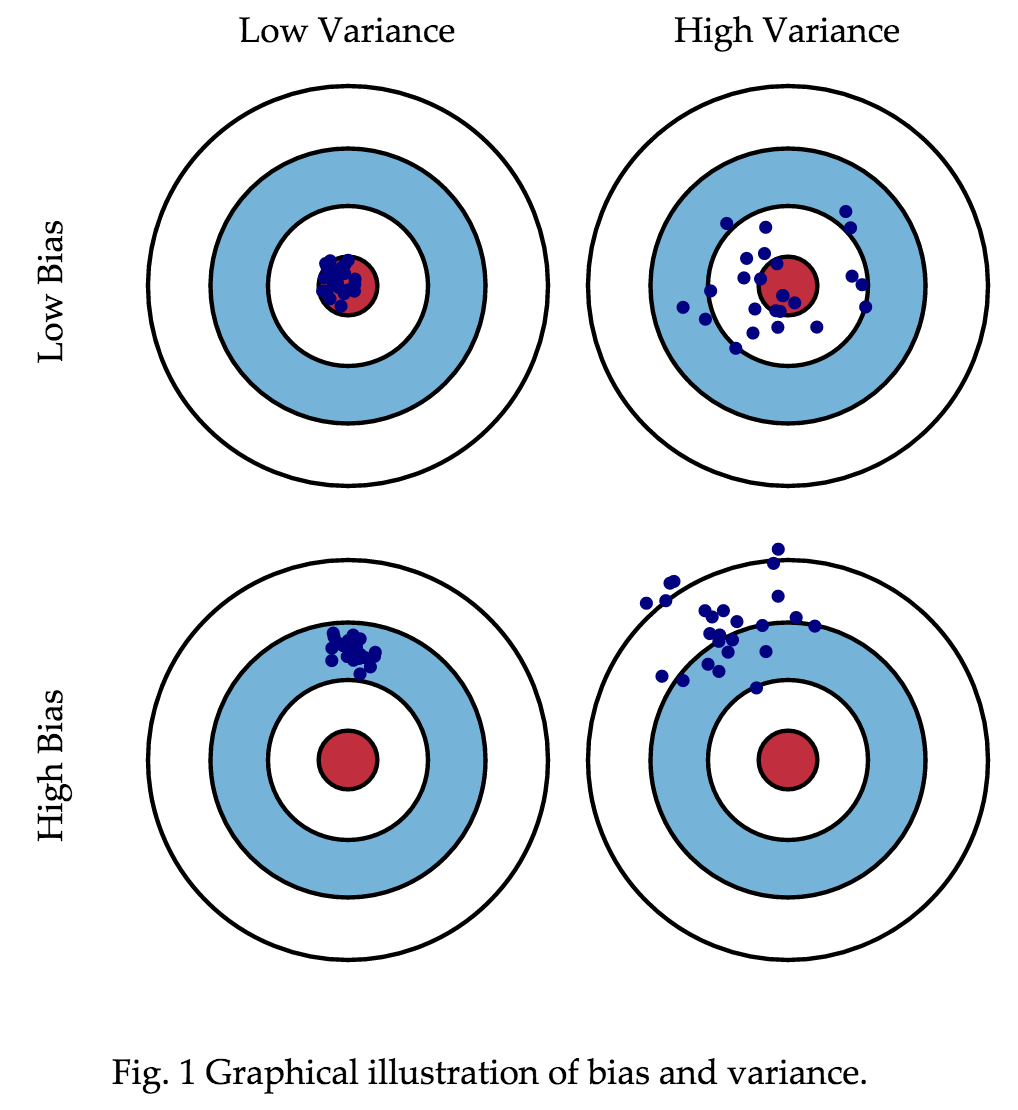

In [10]:
Image(filename='bias-variance.png', width=500)

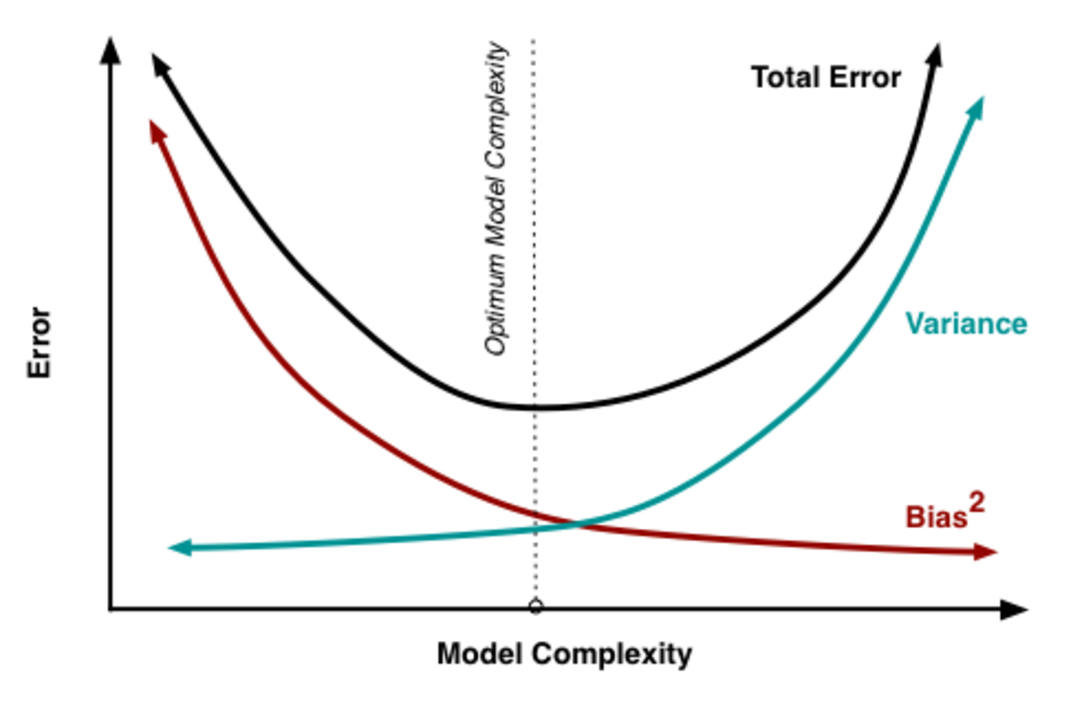

In [11]:
Image(filename='model-complexity.png', width=500)

# Random Forest

- Bagging
- Bootstrap the data
- Subsample the features for additional randomness
- OOB error rate on data left out
- Improve accuracy by reducing variance (via voting)

## Algorithm

Proposed by Leo Breiman, also the author of CART ![Leo Breiman](https://upload.wikimedia.org/wikipedia/en/4/4d/Leo_Breiman.jpg)

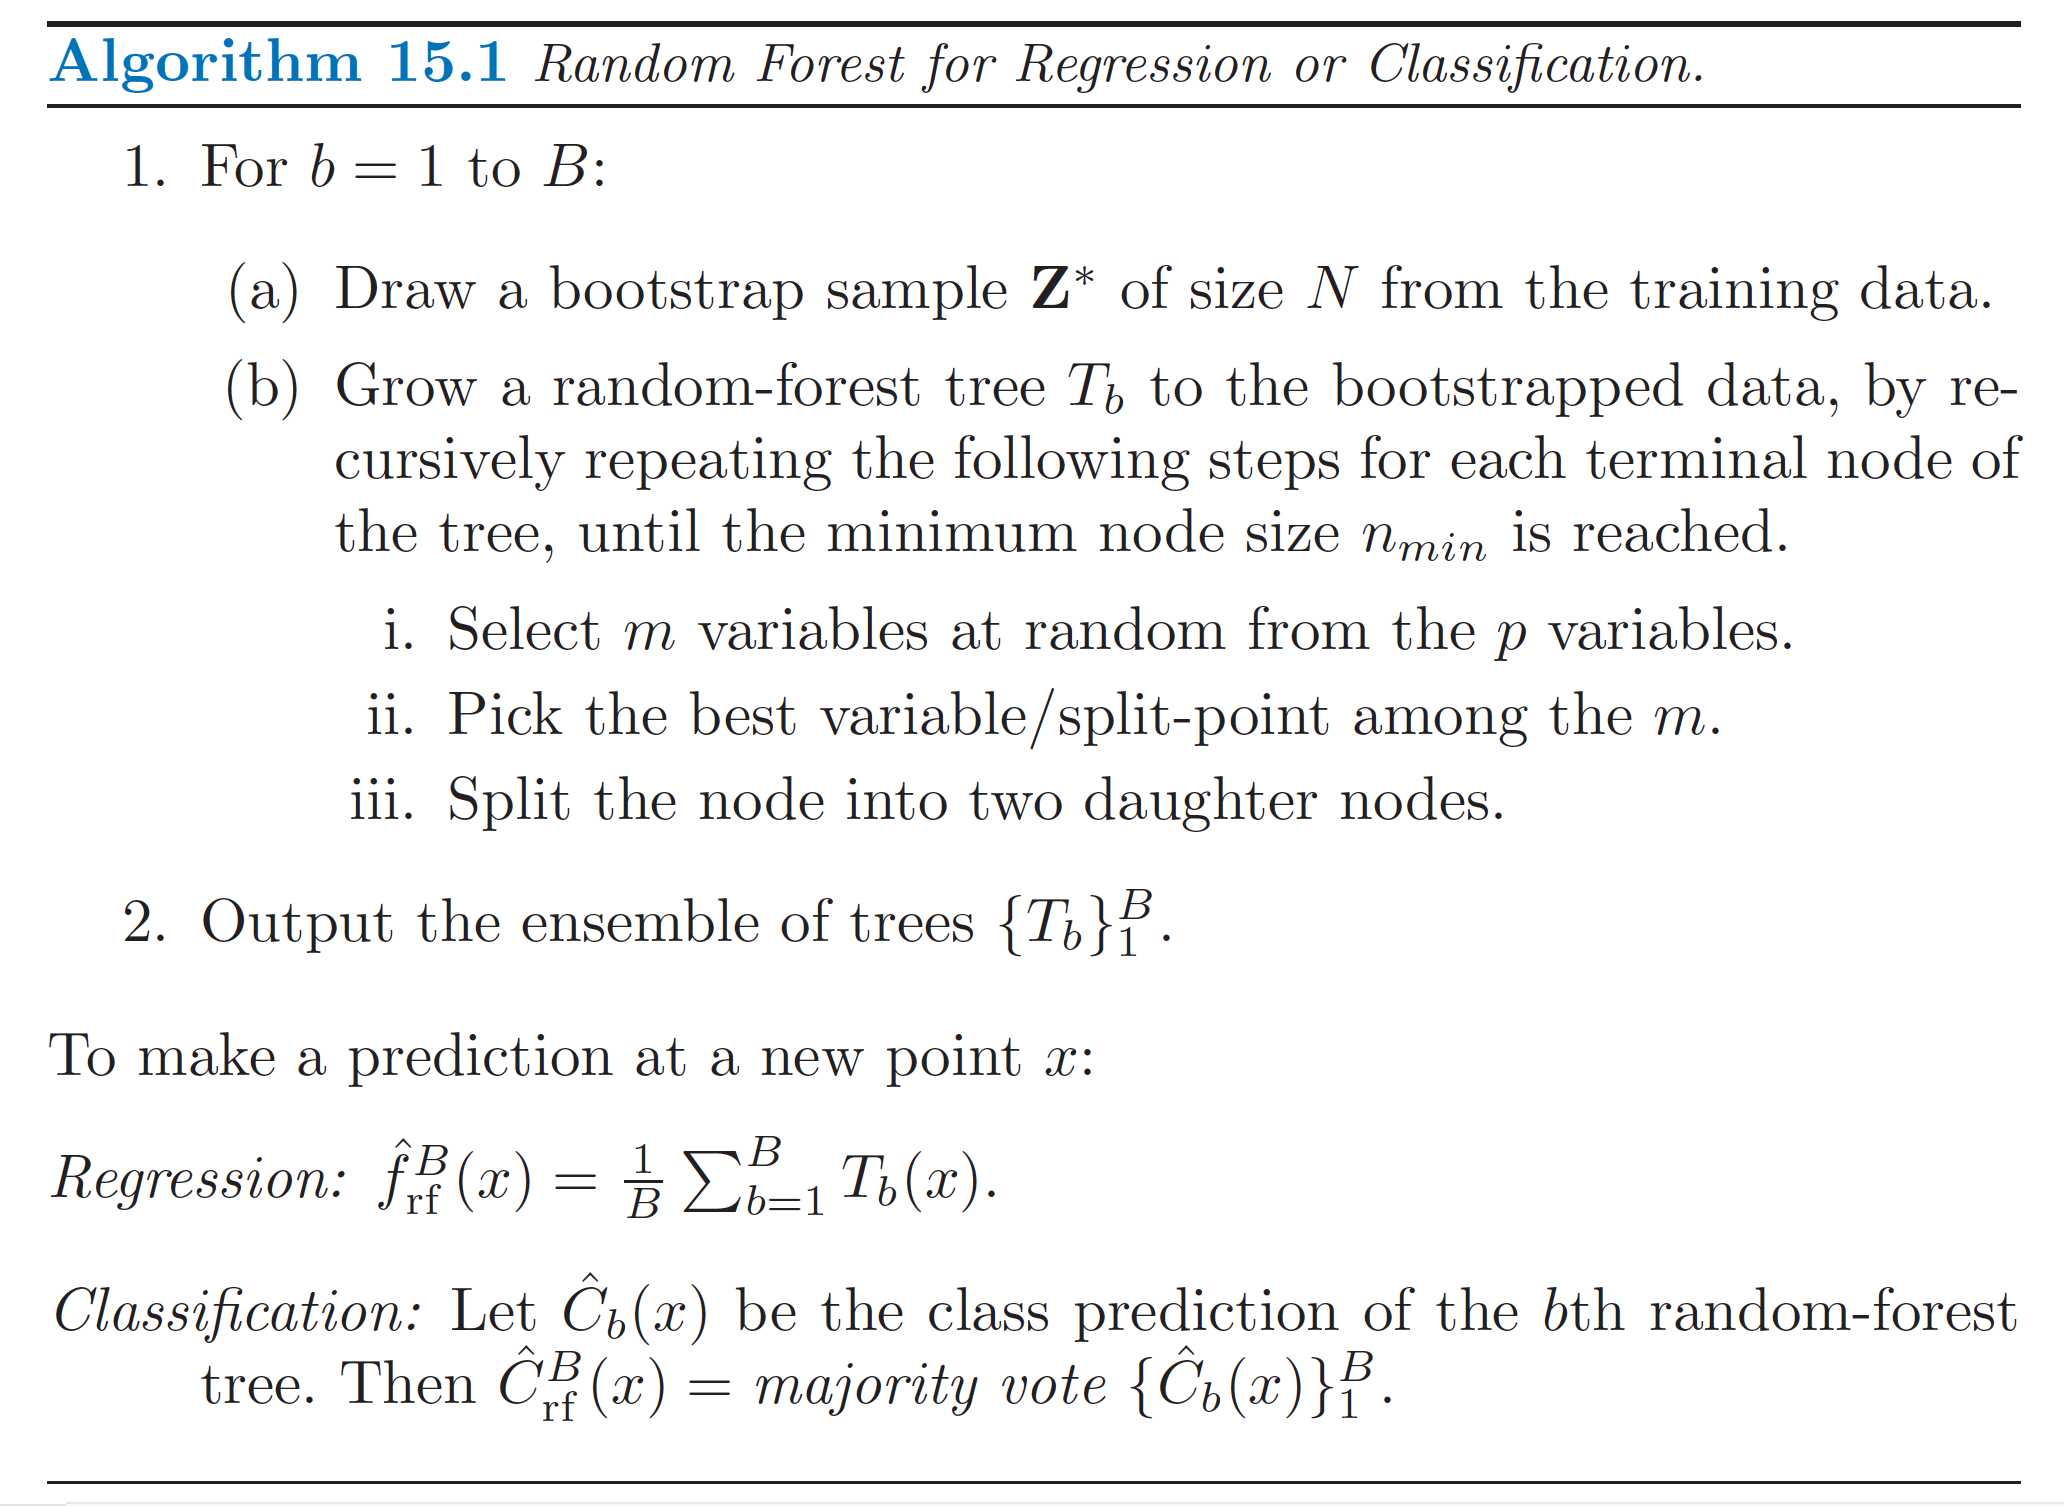

In [9]:
Image(filename='random-forest-algo.png', width=700)

## Bootstrap

Sampling with replacement, introduced by Bradley Efron

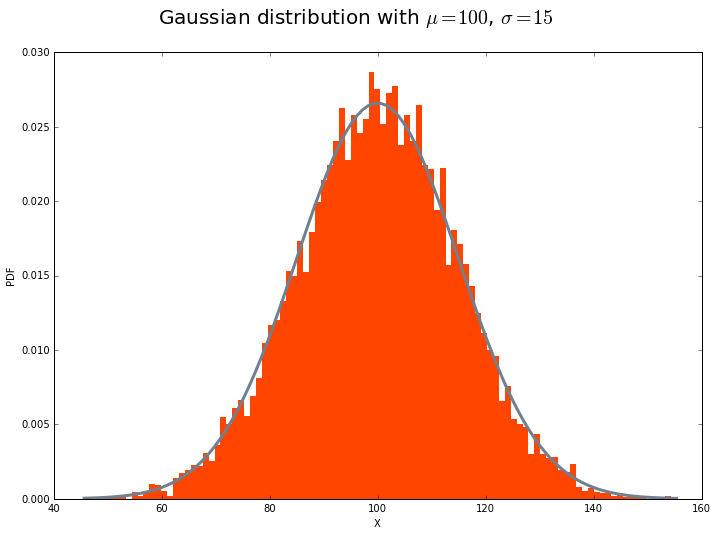

In [113]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

np.random.seed(seed=10)
# Normal distribution
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)

num_bins = 100
fig = plt.figure(figsize=(12, 8))
# Empirical histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor=c_orange_red, linewidth=0)
# Real distribution
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, c_grey, linewidth=3)
plt.xlabel('X')
plt.ylabel('PDF')
plt.suptitle(r'Gaussian distribution with $\mu=100$, $\sigma=15$', fontsize=20)

plt.subplots_adjust(left=0.15)
plt.show()

Mean: 75.119263, Std.: 34.340162


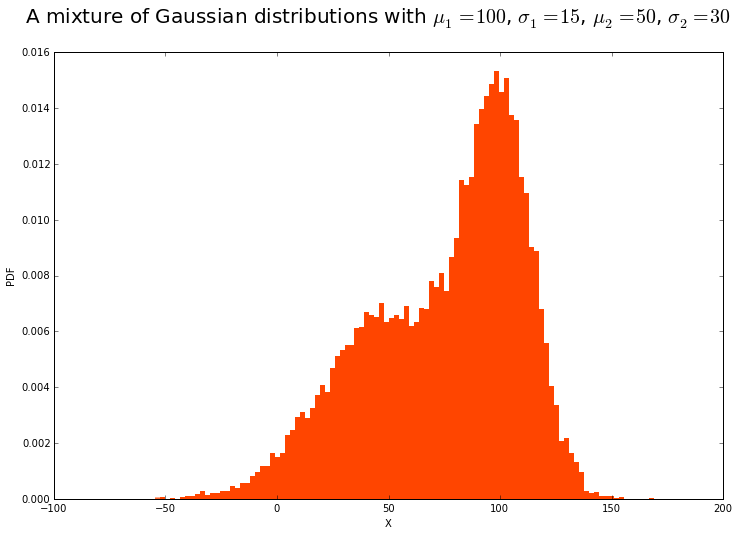

In [114]:
np.random.seed(seed=10)
x1 = 100 + 15 * np.random.randn(10000)
np.random.seed(seed=11)
x2 = 50 + 30 * np.random.randn(10000)
x3 = np.append(x1, x2)
print('Mean: %f, Std.: %f' % (np.mean(x3), np.std(x3)))

fig = plt.figure(figsize=(12, 8))
# Empirical histogram of the data
n, bins, patches = plt.hist(x3, num_bins, normed=1, facecolor=c_orange_red, linewidth=0)
# Real distribution
plt.xlabel('X')
plt.ylabel('PDF')
plt.suptitle(r'A mixture of Gaussian distributions '
              'with $\mu_1=100$, $\sigma_1=15$, $\mu_2=50$, $\sigma_2=30$',
             fontsize=20)

plt.show()

Mean: 75.433281, Std.: 34.249282


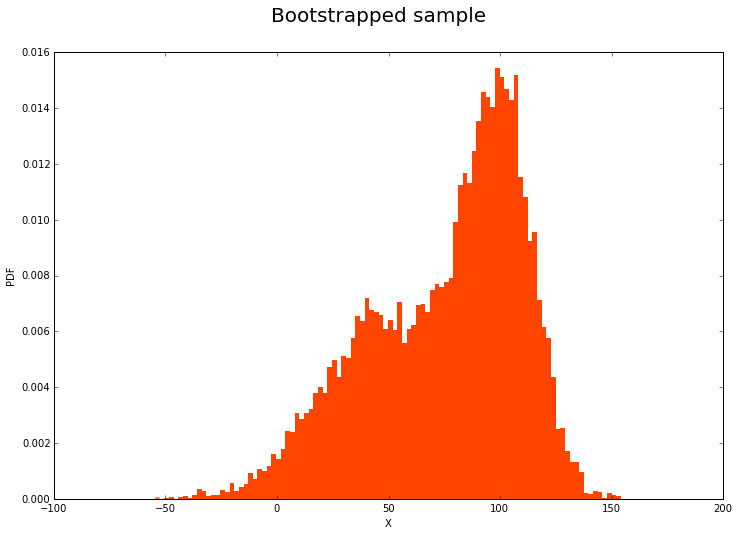

In [115]:
x4 = []
for i in range(20000):
    x4.append(np.random.choice(x3))
print('Mean: %f, Std.: %f' % (np.mean(x4), np.std(x4)))

fig = plt.figure(figsize=(12, 8))
# Empirical histogram of the data
n, bins, patches = plt.hist(x4, num_bins, normed=1, facecolor=c_orange_red, linewidth=0)
# Real distribution
plt.xlabel('X')
plt.ylabel('PDF')
plt.suptitle(r'Bootstrapped sample',
          fontsize=20)

plt.show()

## Robust measures of population statistics

In [54]:
means, stds = [], []
for t in range(100):
    for i in range(20000):
        x4.append(np.random.choice(x3))
    means.append(np.mean(x4)), stds.append(np.std(x4))

print(np.mean(means), np.std(means))
print(np.mean(stds), np.std(stds))

(75.142559702015305, 0.012386308723319915)
(34.342425675588899, 0.0060153483259489391)


## The advantage of ensembling

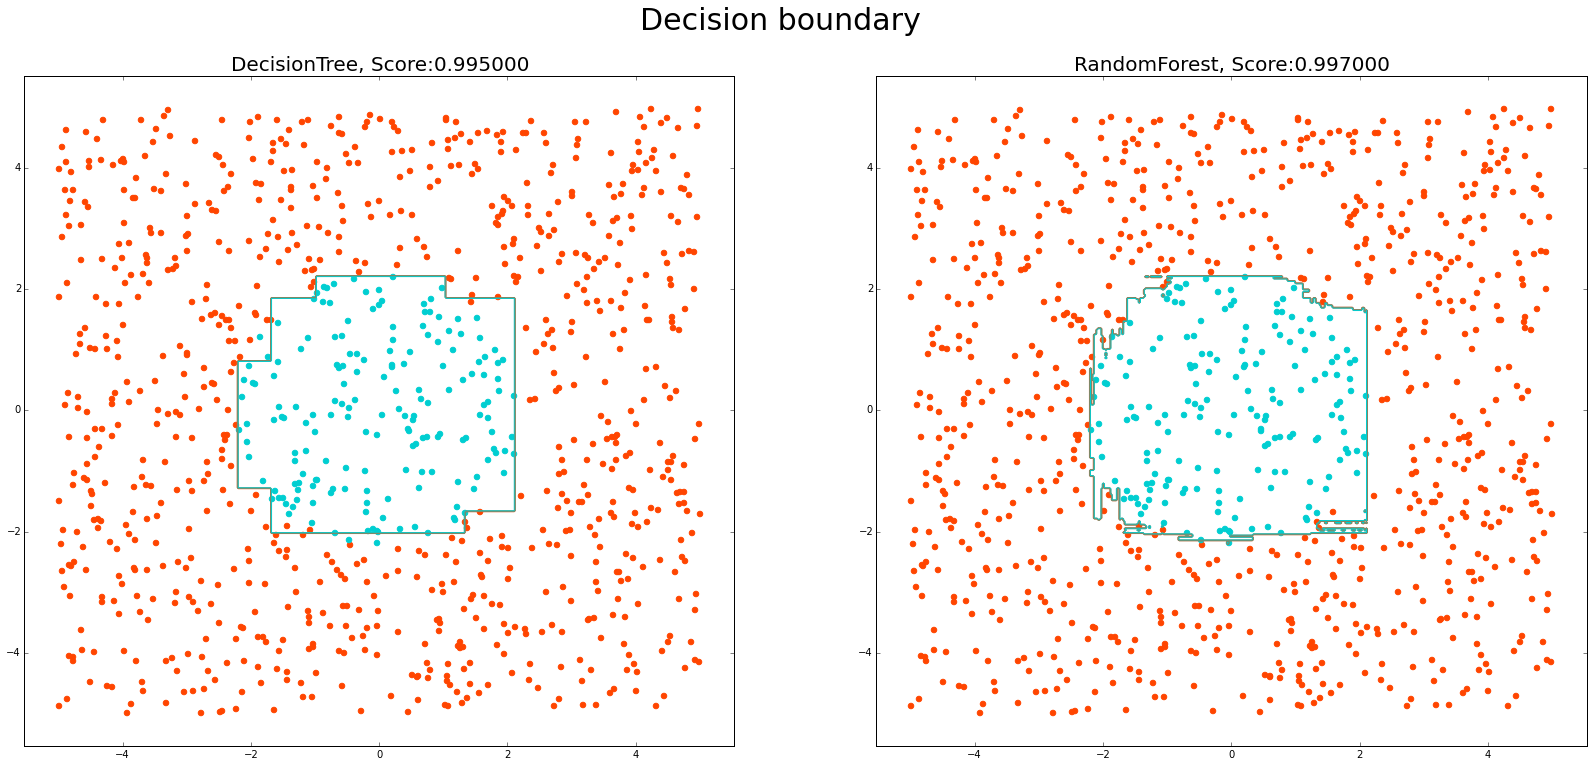

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six.moves import xrange

# Parameters
n_classes = 2
n_estimators = 30
plot_colors = [c_orange_red, c_turquoise]
cmap = plt.cm.RdBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=8),
          RandomForestClassifier(n_estimators=n_estimators, max_depth=8, random_state=101)]

fig = plt.figure(figsize=(28, 12))

for model in models:
    X = np.asarray(zip(xs, ys))
    y = class1_mask.astype(int)

    clf = model.fit(X, y)
    scores = clf.score(X, y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")] + ", Score:%f" % scores
    plt.subplot(1, 2, plot_idx)
    if plot_idx <= len(models):
        # Add a title at the top of each column
        plt.title(model_title, fontsize=20)

    # Now plot the decision boundary using a fine mesh as input to a
    # filled contour plot
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    cs = plt.contour(xx, yy, pred, colors=plot_colors, linewidth=10)

    # Plot the training points
    for i, c in zip(xrange(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=c, s=30)

    plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Decision boundary", fontsize=30)
plt.axis("tight")

plt.show()

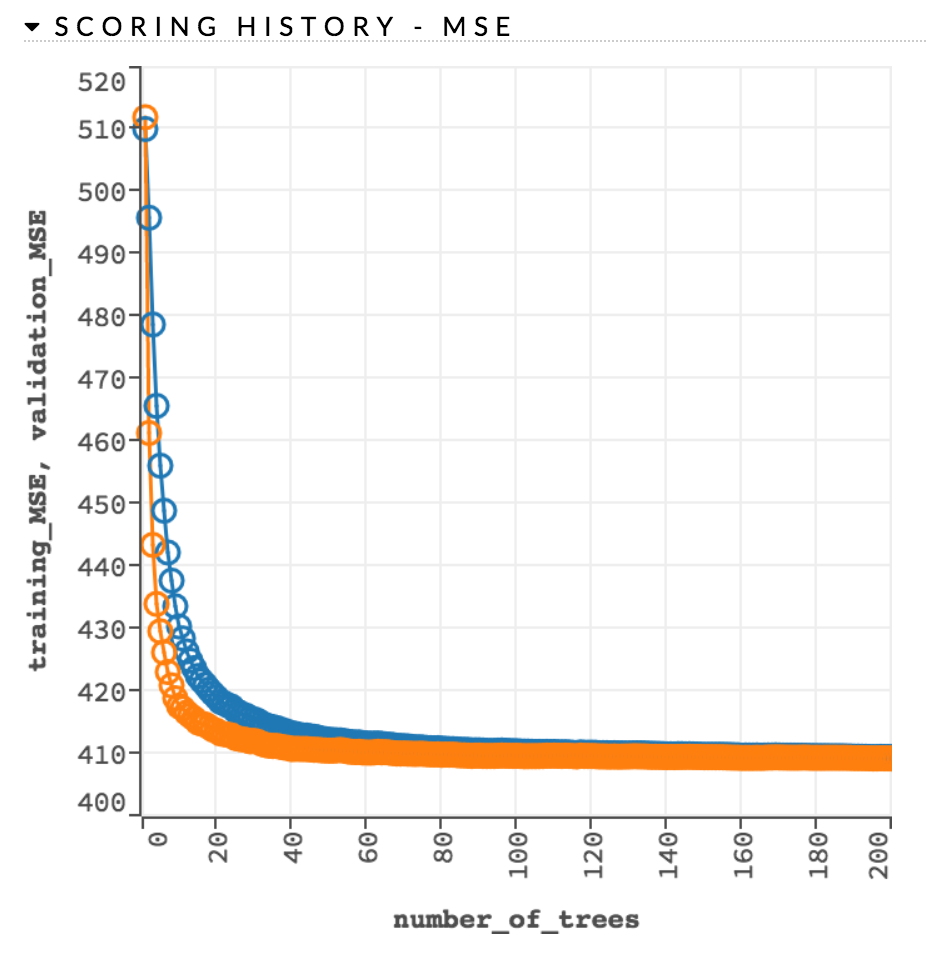

In [6]:
Image(filename='hero-intl-train.png', width=500)

- Shake up the dataset so that each tree will see slightly different data.
- Overfitting of a single tree will be corrected by other trees. Having more trees seldom leads to overfitting of the forest.
- Reduces overall error by reducing variance.
- **No need to have a test set!** Bootstrap will leave part of the data out (Out of the Bag, **OOB**), and that part of data can be used as a test set.

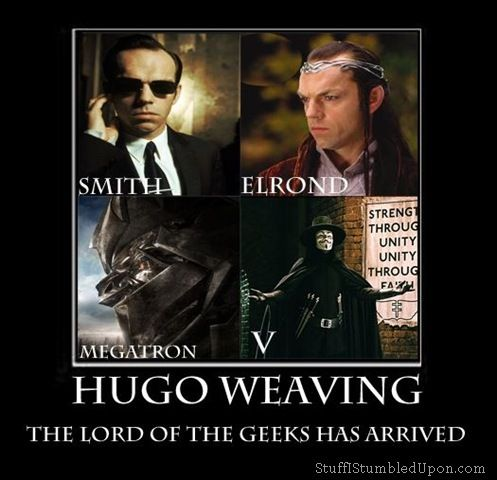

In [58]:
Image(filename='hugo-weaving.jpg')

# Gradient Boost Trees

- Boosting
- Each tree tries to decrease the loss function along the direction of its gradient (steepest descent) 
- The next tree take the problem left over by the current one
- Combine weak trees together, with weights

## Algorithm

Proposed by Jerome H. Friedman
![Jerome Friedman](https://statistics.stanford.edu/sites/default/files/styles/portrait/public/friedman_new.jpg) 

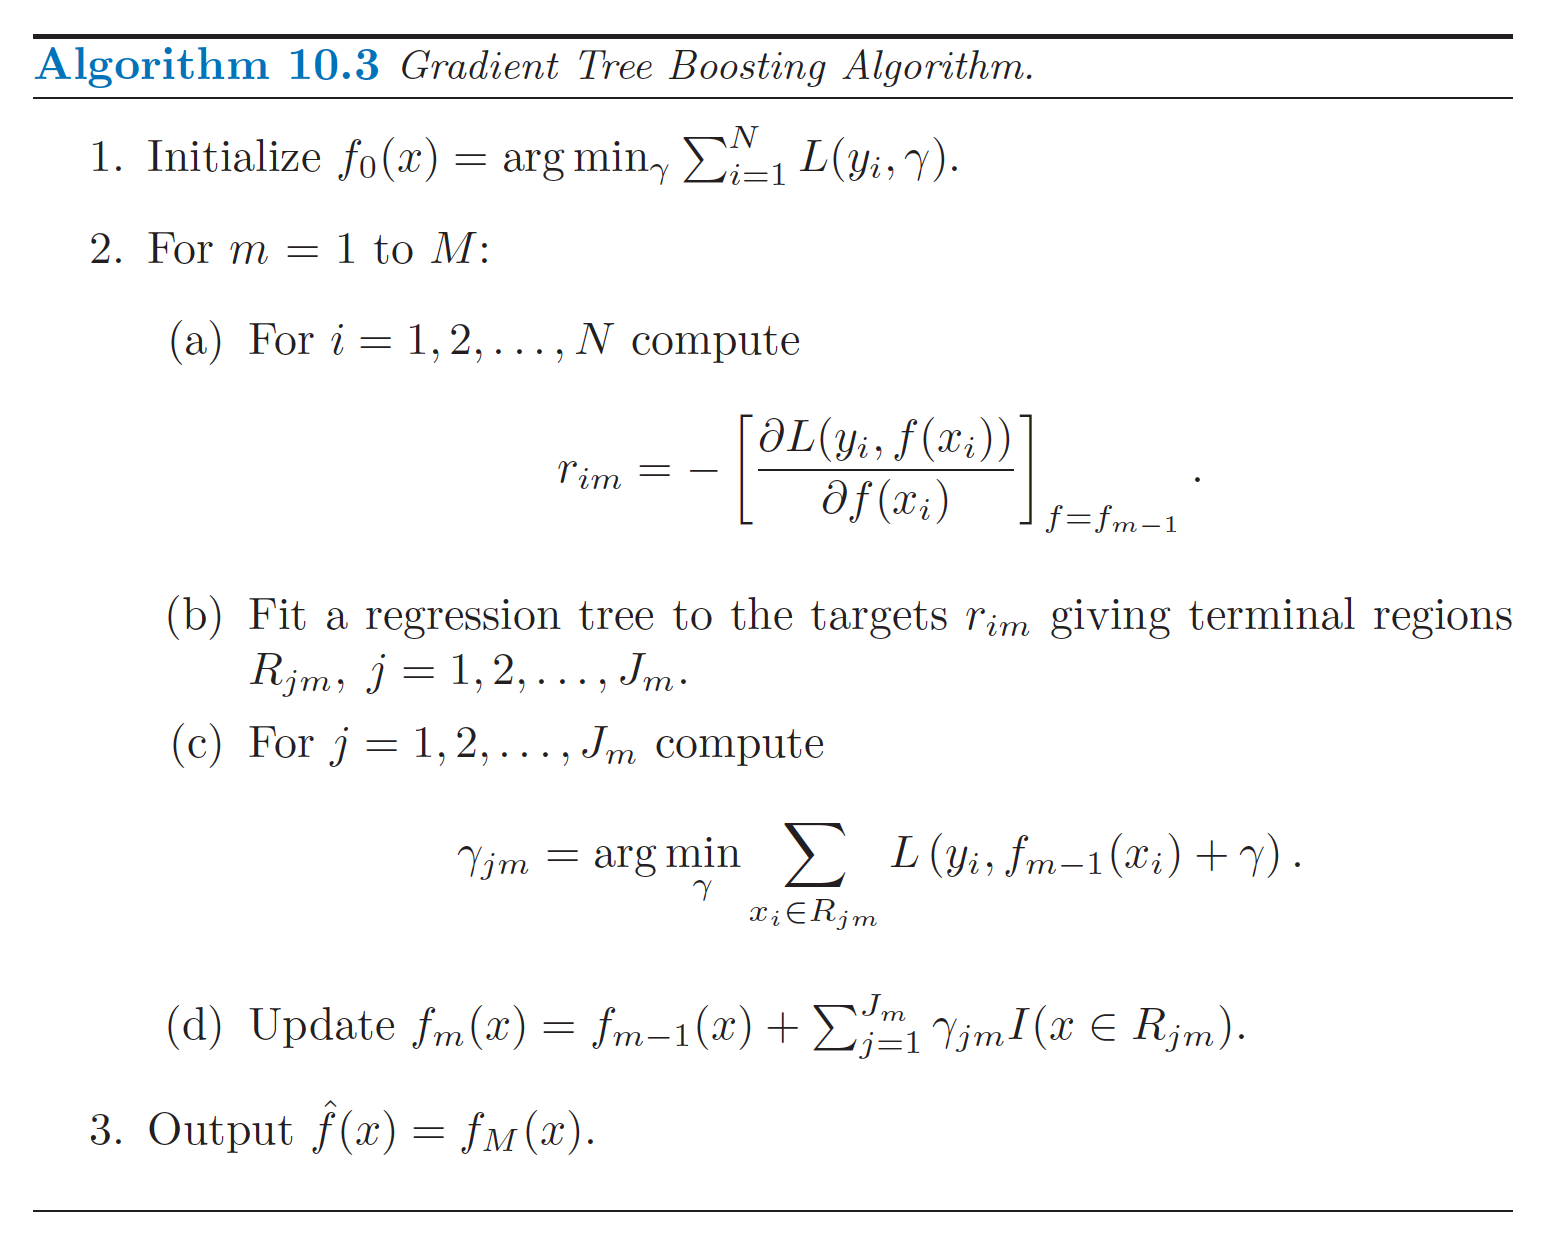

In [8]:
Image(filename='gradient-boost-tree.png', width=700)

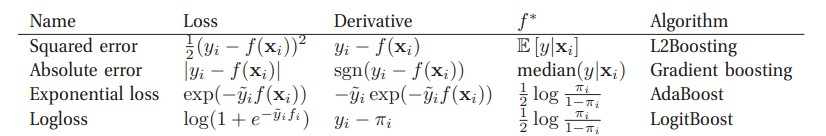

In [21]:
Image(filename='loss-and-gradient.jpeg')

In [ ]:
# Scikit-learn
class LeastSquaresError(RegressionLossFunction):
    def __call__(self, y, pred, sample_weight=None):
        return np.mean((y - pred.ravel()) ** 2.0)

    def negative_gradient(self, y, pred, **kargs):
        return y - pred.ravel()

class LeastAbsoluteError(RegressionLossFunction):
    def __call__(self, y, pred, sample_weight=None):
        return np.abs(y - pred.ravel()).mean()

    def negative_gradient(self, y, pred, **kargs):
        """1.0 if y - pred > 0.0 else -1.0"""
        pred = pred.ravel()
        return 2.0 * (y - pred > 0.0) - 1.0

In [ ]:
# Xgboost
inline float FirstOrderGradient(float predt, float label) const {
    switch (loss_type) {
        case kLinearSquare: return predt - label;
        case kLogisticRaw: predt = 1.0f / (1.0f + std::exp(-predt));
        case kLogisticClassify:
        case kLogisticNeglik: return predt - label;
        default: utils::Error("unknown loss_type"); return 0.0f;
    }
}

## Tree depth

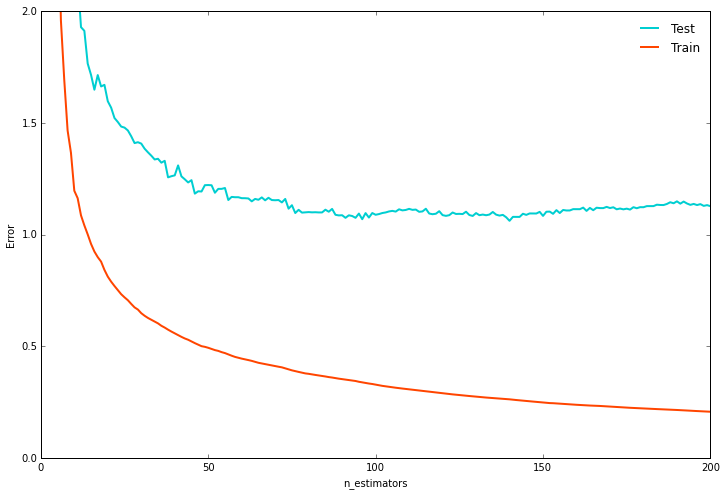

In [127]:
n_estimators = 200

def deviance_plot(est, X_test, y_test, ax=None, label='',
                  train_color=c_orange_red, 
                  test_color=c_turquoise,
                  alpha=1.0, figsize=(12, 8)):
    """Deviance plot for ``est``, use ``X_test`` and ``y_test`` for test error. """
    test_dev = np.empty(n_estimators)
    
    for i, pred in enumerate(est.staged_predict(X_test)):
       test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = plt.gca()
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color=test_color, label='Test %s' % label, 
            linewidth=2, alpha=alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color=train_color, 
            label='Train %s' % label, linewidth=2, alpha=alpha)
    ax.set_ylabel('Error')
    ax.set_xlabel('n_estimators')
    ax.set_ylim((0, 2))
    return test_dev, ax

est = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=1, learning_rate=1.0)
est.fit(X_train, y_train)

test_dev, ax = deviance_plot(est, X_test, y_test)
ax.legend(loc='upper right', frameon=False)

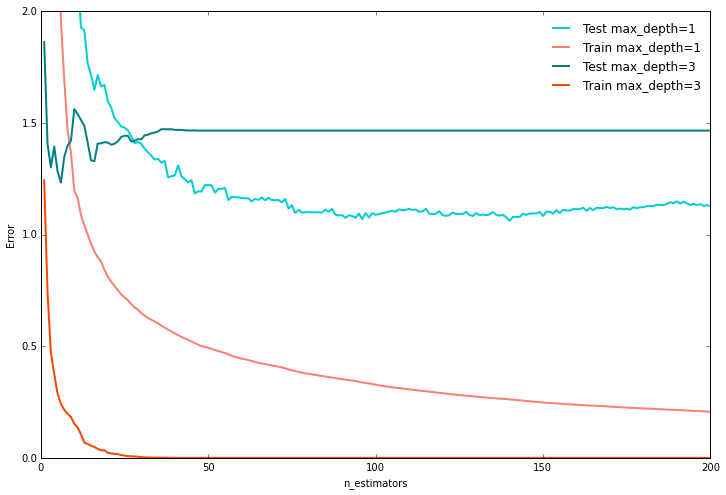

In [128]:
def fmt_params(params):
    return ", ".join("{0}={1}".format(key, val) for key, val in params.iteritems())

fig = plt.figure(figsize=(12, 8))
ax = plt.gca()
for params, (test_color, train_color) in [({'max_depth': 1}, (c_turquoise, c_salmon)),
                                          ({'max_depth': 3}, (c_teal, c_orange_red))]:
    est = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=1.0)
    est.set_params(**params)
    est.fit(X_train, y_train)
    
    test_dev, ax = deviance_plot(est, X_test, y_test, ax=ax, label=fmt_params(params),
                                 train_color=train_color, test_color=test_color)

plt.legend(loc='upper right', frameon=False)

### Why stumps?

Because deeper trees mean more interactions between features
- Stump: `X<5?` -- No interaction between features
- Depth 2: `X<5 && Y>3?` -- 2nd order interaction between (X, Y)
- Depth 3: `X<5 && Y>3 && Z<20?` -- 3rd order interaction between (X, Y, Z)

## Learning rate

Slow down the learning (and overfitting)

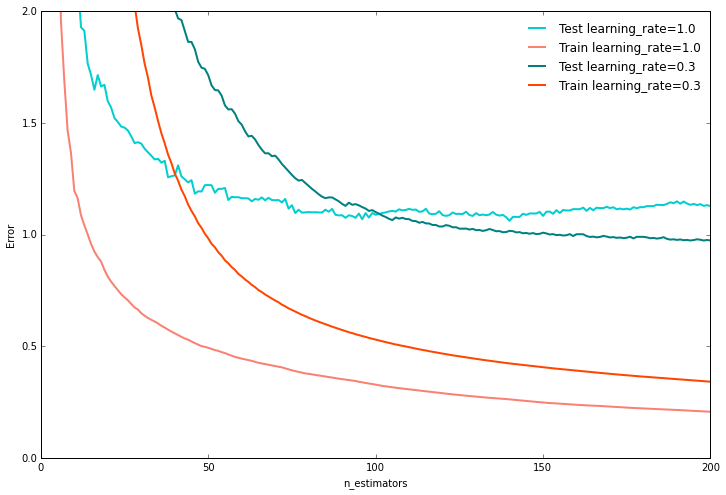

In [137]:
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()
for params, (test_color, train_color) in [({'learning_rate': 1.0}, (c_turquoise, c_salmon)),
                                          ({'learning_rate': 0.3}, (c_teal, c_orange_red))]:
    est = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=1)
    est.set_params(**params)
    est.fit(X_train, y_train)
    
    test_dev, ax = deviance_plot(est, X_test, y_test, ax=ax, label=fmt_params(params),
                                 train_color=train_color, test_color=test_color)

plt.legend(loc='upper right', frameon=False)

# Ensembling

Stack models together

## Combine Random Forest and Gradient Boost Trees!

Wait, what?

Yep, this is called **Stochastic Gradient Boost**: for each tree, use a subsample of the dataset to train.

Usually combine it with shrinkage.

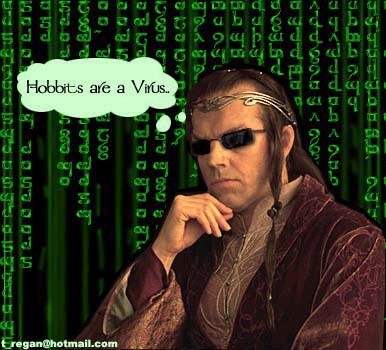

In [59]:
Image(filename='agent-elrond.jpg')

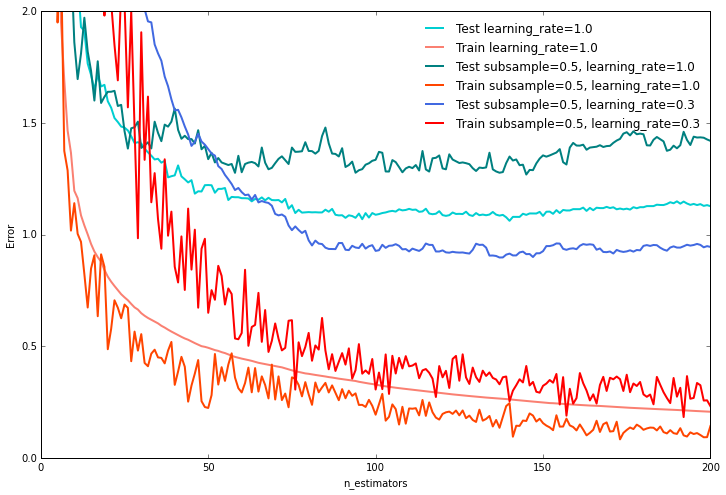

In [146]:
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()
for params, (test_color, train_color) in [({'learning_rate': 1.0}, (c_turquoise, c_salmon)),
                                          ({'learning_rate': 1.0, 'subsample': 0.5}, (c_teal, c_orange_red)),
                                          ({'learning_rate': 0.3, 'subsample': 0.5}, (c_royal_blue, 'red'))]:
    est = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=1)
    est.set_params(**params)
    est.fit(X_train, y_train)
    
    test_dev, ax = deviance_plot(est, X_test, y_test, ax=ax, label=fmt_params(params),
                                 train_color=train_color, test_color=test_color)

plt.legend(loc='upper right', frameon=False)

## Other way of ensembling

## Regularization

We want predictive AND simple models.

Penalize complex model, favor simple ones, make feature importance sparse

## Lasso and Ridge regressions

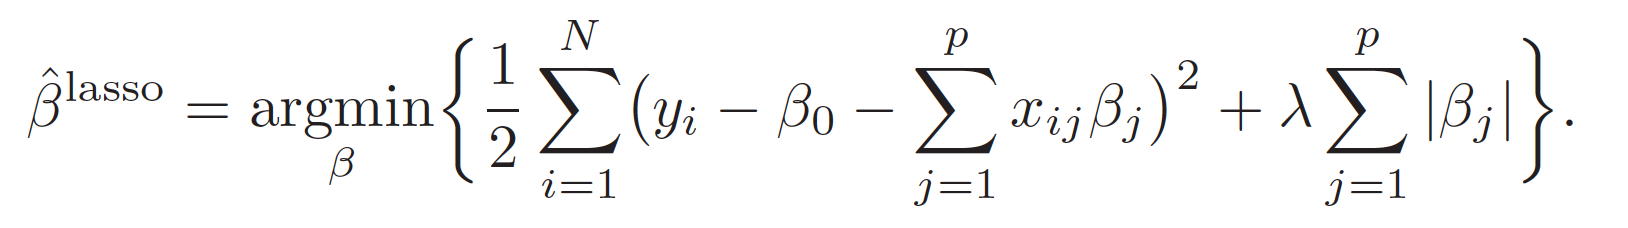

In [16]:
Image(filename='lasso.png', width=800)

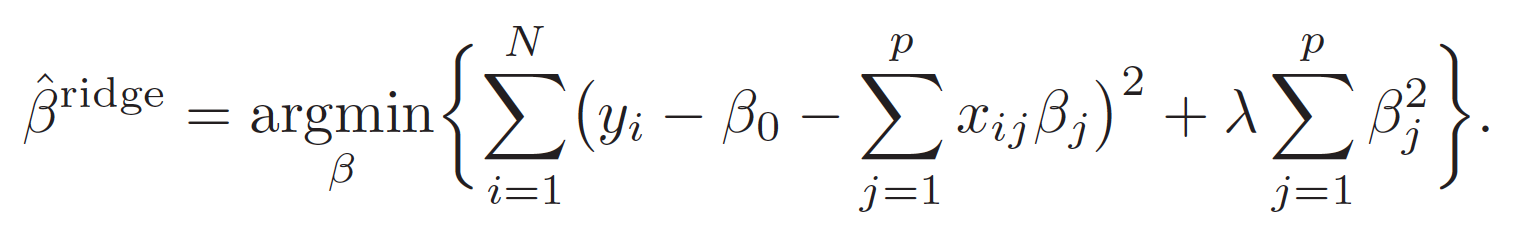

In [79]:
Image(filename='ridge.png', width=750)

## Importance Sampled Learning Ensemble (ISLE)

Basically post-process the trees with LASSO

Lasso'd Gradient Boosting Trees

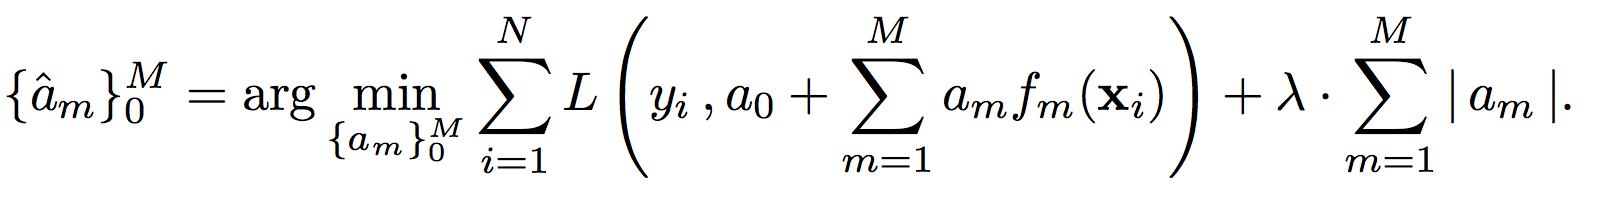

In [17]:
Image(filename='isle.png', width=800)

### When is it useful?

It reduces the number of trees while preserving the predicting power, which means that in production the scoring can be **faster**!

# XGBoost

It performs well, and it's fast. But WHY?

## Models complexity
Explicitly takes into account model complexity (which is often poorly done or completely ignored in other implementations, e.g. Scikit-learn)

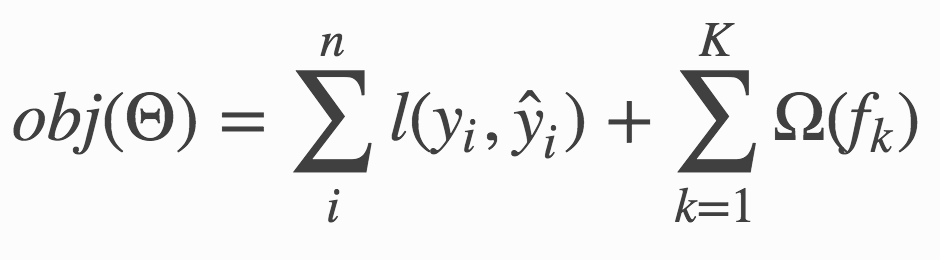

In [32]:
Image(filename='xgboost-obj.png', width=400)

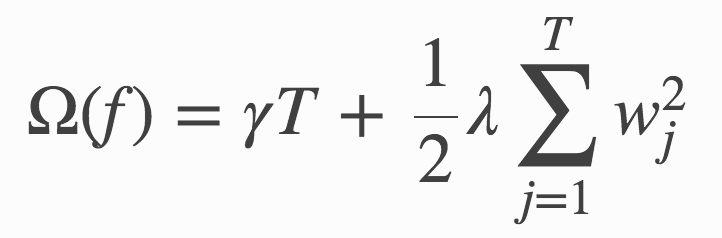

In [34]:
Image(filename='xgboost-complexity.png', width=300)

## Faster optimization
Employ **Newton's method** (or its approximation, e.g. BFGS), which uses the 2nd order derivative (information on the curvature) of the loss function to inform the search. It approximates the function by the 2nd order Taylor expansion.

Compared to gradient (steepest) descent, this method is more expensive **per step** but *might* result in **much fewer steps**.

Oh, did I say it's written in **C++**?

Loss function: MSE


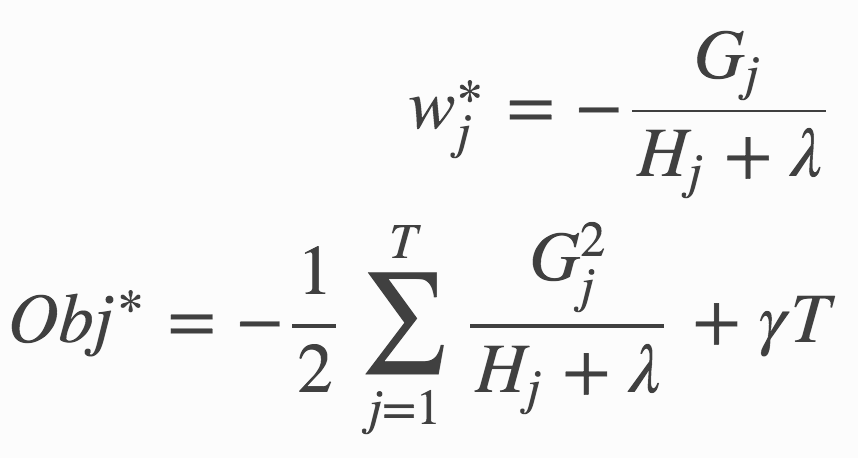

In [25]:
print('Loss function: MSE')
Image(filename='xgboost-best.png', width=300)

## Newton's method vs. Gradient descent

Let's take a parabola as the example:
$$y=(x-2)^2$$

Compute the first order derivative (the gradient):
$$y'(x)=\frac{dy}{dx}=2(x-2)$$

Compute the second order derivative (the Hessian matrix):
$$y''(x)=\frac{d^2y}{dx^2} = 2$$

Gradient does the search
$$x_{n+1} = x_n - \delta y'(x_n) $$

While Newton's method does the search
$$x_{n+1} = x_n - \frac{y'(x_n)}{y''(x_n)} $$

In [124]:
def y(x):
    return (x - 2.) ** 2

def y_prime(x):
    return 2. * (x - 2)

def y_double_prime(x):
    return 2.

# Set initial condition
x0 = -10
y0 = y(x0)
delta = 0.9

# Do the gradient descent
cur_x, cur_y = x0, y0
xs_gd, ys_gd = [cur_x], [cur_y]
while (cur_y > 1e-5 and len(xs_gd) < 100):
    cur_x = cur_x - delta * y_prime(cur_x)
    cur_y = y(cur_x)
    xs_gd.append(cur_x)
    ys_gd.append(cur_y)

# Do Newton's method
cur_x, cur_y = x0, y0
xs_nm, ys_nm = [cur_x], [cur_y]
while (cur_y > 1e-5 and len(xs_nm) < 100):
    cur_x = cur_x - y_prime(cur_x) / y_double_prime(cur_x)
    cur_y = y(cur_x)
    xs_nm.append(cur_x)
    ys_nm.append(cur_y)


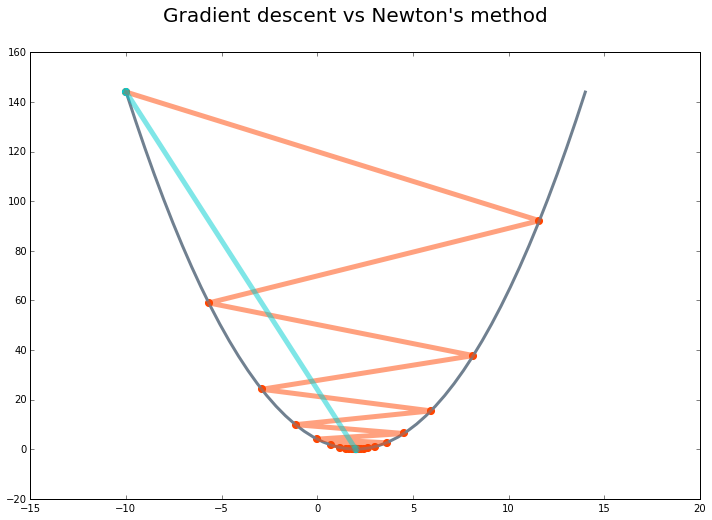

In [125]:
x_plot = np.linspace(-10, 14)
y_plot = (x_plot - 2) ** 2

fig = plt.figure(figsize=(12, 8))
plt.plot(x_plot, y_plot, label='$y = (x-2)^2$',
         alpha=1, linewidth=3, color=c_grey)

plt.scatter(xs_gd, ys_gd, s=50, color=c_orange_red)
plt.plot(xs_gd, ys_gd, linewidth=5, color=c_orange_red, alpha=0.5)

plt.scatter(xs_nm, ys_nm, s=50, color=c_turquoise)
plt.plot(xs_nm, ys_nm, linewidth=5, color=c_turquoise, alpha=0.5)

plt.suptitle("Gradient descent vs Newton's method", fontsize=20)

In [ ]:
  inline float FirstOrderGradient(float predt, float label) const {
    switch (loss_type) {
      case kLinearSquare: return predt - label;
      case kLogisticRaw: predt = 1.0f / (1.0f + std::exp(-predt));
      case kLogisticClassify:
      case kLogisticNeglik: return predt - label;
      default: utils::Error("unknown loss_type"); return 0.0f;
    }
  }
  /*!
   * \brief calculate second order gradient of loss, given transformed prediction
   * \param predt transformed prediction
   * \param label true label
   * \return second order gradient
   */

  inline float SecondOrderGradient(float predt, float label) const {
    // cap second order gradient to postive value
    const float eps = 1e-16f;
    switch (loss_type) {
      case kLinearSquare: return 1.0f;
      case kLogisticRaw: predt = 1.0f / (1.0f + std::exp(-predt));
      case kLogisticClassify:
      case kLogisticNeglik: return std::max(predt * (1.0f - predt), eps);
      default: utils::Error("unknown loss_type"); return 0.0f;
    }
  }


# With all that said...

Knowing these is perfectly useless towards winning a Kaggle competition. We still need the hands-on experience.

# References

- *Elements of Statistical Learning*, Trevor Hastie (laid foundation of R), Robert Tibshirani (inventor of Lasso), Jerome Friedman (inventor of Gradient Boosting Machines)![](http://ecx.images-amazon.com/images/I/41LeU3HcBdL._SY344_BO1,204,203,200_.jpg)

- http://scott.fortmann-roe.com/docs/BiasVariance.html

- http://nbviewer.ipython.org/github/pprett/pydata-gbrt-tutorial/blob/master/gbrt-tutorial.ipynb

- Scikit Learn

- XGBoost